<h1>Data mining</h1>

<h2>Reading in neccesary dependencies</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Importing dataset</h3>

We are working with a reduced dataset, becuase older entries had too many missing values and won't provide quality information.

In [2]:
data =  pd.read_csv("data/cleanedData.csv")

<h2>Statistical figures in whole dataset<h2>

In [3]:
cars = len(data)
print("Total number of cars: " + str(cars))


for county in data["Maakond"].unique():
    countyData = data.loc[data['Maakond'] == county]
    print("Cars in " + str(county) + ": " + str(round(len(countyData)/cars,2)) + "%")


stopedCars = len(data[data["Üldine staatus"] == "PEATATUD"])
print("Cars without registration: " + str(stopedCars))
print("Cars without registration: " + str(stopedCars/cars))


atCars = len(data[(data["Käigukasti tüüp"] == "CVT") |
                         (data["Käigukasti tüüp"] == "AUTOMAAT")])
print("Cars with automatic transimssions: " + str(atCars))


gasolineCars = len(data[(data["Mootori tüüp"] == "BENSIIN_KATALYSAATOR") |
                              (data["Mootori tüüp"] == "BENSIIN_HYBRIID")|
                              (data["Mootori tüüp"] == "BENSIIN")])
dieselCars = len(data[(data["Mootori tüüp"] == "DIISEL") |
                              (data["Mootori tüüp"] == "DIISEL_HYBRIID")])
electricCars = len(data[(data["Mootori tüüp"] == "ELEKTER")])

gasolinePercentage = round((gasolineCars/cars) * 100, 2)
dieselPercentage =  round((dieselCars/cars) * 100, 2)
electricPercentage =  round((electricCars/cars) * 100, 2)

print("Gasoline cars: " + str(gasolinePercentage))
print("Diesel cars: " + str(dieselPercentage))
print("Electric cars: " + str(electricPercentage))



topBrands = data.groupby("Mark").size().sort_values(ascending=False)
topModels = data.groupby("Mudel").size().sort_values(ascending=False)

topColors = data.groupby("Värv").size().sort_values(ascending=False)
topType = data.groupby("Keretüüp").size().sort_values(ascending=False)

print("Top bodytype: " + str(topType.index[0]))
print("Top color: " + str(topColors.index[0]))

brand1 = str(topBrands.index[0]) + " " + str(round((topBrands[0]/cars)*100,1))
brand2 = str(topBrands.index[1]) + " " + str(round((topBrands[1]/cars)*100,1))
brand3 = str(topBrands.index[2]) + " " + str(round((topBrands[2]/cars)*100,1))

print("Top 1 brand: " + str(brand1))
print("Top 2 brand: " + str(brand2))
print("Top 3 brand: " + str(brand3))

model1 = str(topModels.index[0]) + " " + str(round((topModels[0]/cars)*100,1))
model2 = str(topModels.index[1]) + " " + str(round((topModels[1]/cars)*100,1))
model3 = str(topModels.index[2]) + " " + str(round((topModels[2]/cars)*100,1))

print("Top 1 model: " + str(model1))
print("Top 2 model: " + str(model2))
print("Top 3 model: " + str(model3))


avgEngine = data["Mootori võimsus"].mean()
avgCO2 = data["CO2"].mean()
avgMass = data["Tühimass"].mean()

print("Avg enginge: " + str(avgEngine))
print("Avg CO2: " + str(avgCO2))
print("Avg Mass: " + str(avgMass))


Total number of cars: 641522
Cars in HARJU MAAKOND: 0.44%
Cars in PÄRNU MAAKOND: 0.06%
Cars in MÄÄRAMATA: 0.02%
Cars in TARTU MAAKOND: 0.11%
Cars in JÕGEVA MAAKOND: 0.02%
Cars in IDA-VIRU MAAKOND: 0.08%
Cars in VILJANDI MAAKOND: 0.04%
Cars in PÕLVA MAAKOND: 0.02%
Cars in JÄRVA MAAKOND: 0.02%
Cars in LÄÄNE MAAKOND: 0.02%
Cars in LÄÄNE-VIRU MAAKOND: 0.05%
Cars in SAARE MAAKOND: 0.03%
Cars in RAPLA MAAKOND: 0.03%
Cars in VÕRU MAAKOND: 0.03%
Cars in HIIU MAAKOND: 0.01%
Cars in VALGA MAAKOND: 0.02%
Cars without registration: 59271
Cars without registration: 0.09239121963081547
Cars with automatic transimssions: 297510
Gasoline cars: 53.61
Diesel cars: 45.85
Electric cars: 0.25
Top bodytype: UNIVERSAAL
Top color: MUST
Top 1 brand: VOLKSWAGEN 12.3
Top 2 brand: TOYOTA 9.4
Top 3 brand: AUDI 6.8
Top 1 model: AVENSIS 2.5
Top 2 model: OCTAVIA 2.3
Top 3 model: PASSAT 2.3
Avg enginge: 106.02805577984884
Avg CO2: 164.05875054376824
Avg Mass: 1560.0137797300795


In [4]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2.5 else ''

def get_new_labels(sizes, labels):
    new_labels = [label if size > 100 else '' for size, label in zip(sizes, labels)]
    return new_labels

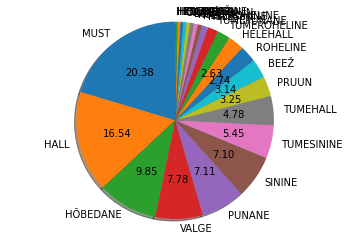

In [5]:
labels = get_new_labels(topColors, topColors.index)
sizes = topColors



fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=my_autopct, shadow=True, startangle=90)
ax1.axis('equal')

plt.show() 

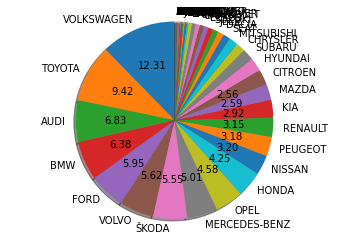

In [6]:
labels = get_new_labels(topBrands, topBrands.index)
sizes = topBrands

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=my_autopct, shadow=True, startangle=90)
ax1.axis('equal')

plt.show() 

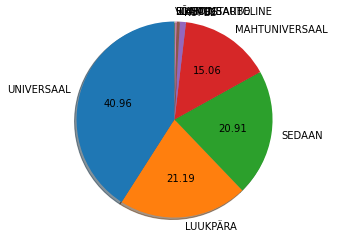

In [7]:
labels = get_new_labels(topType, topType.index)
sizes = topType

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=my_autopct, shadow=True, startangle=90)
ax1.axis('equal')

plt.show() 

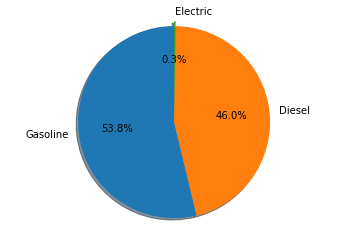

In [8]:
labels = 'Gasoline', 'Diesel', 'Electric'
sizes = [gasolinePercentage, dieselPercentage, electricPercentage]
explode = (0, 0, 0.05) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show() 

<h2>Finding statistical figures per county</h2>

In [9]:
county_dataset = pd.DataFrame(columns=["County","Total","w/o reg. %", "AT %",
                                       "gasoline %", "diesel %", "electric %",
                                       "Top color", "Top type", "Avg engine",
                                       "Avg CO2", "Avg empty mass",
                                       "Brand 1", "Brand 2", "Brand 3",
                                      "Model 1", "Model 2", "Model 3"])

i =0
for county in data["Maakond"].unique():
    countyData = data.loc[data['Maakond'] == county]
    
    cars = len(countyData)
    stopedCars = len(countyData[countyData["Üldine staatus"] == "PEATATUD"])
    atCars = len(countyData[(countyData["Käigukasti tüüp"] == "CVT") |
                             (countyData["Käigukasti tüüp"] == "AUTOMAAT")])
    stopedPercentage = round((stopedCars/cars) * 100, 2)
    atPercentage = round((atCars/cars) * 100, 2)
    
    gasolineCars = len(countyData[(countyData["Mootori tüüp"] == "BENSIIN_KATALYSAATOR") |
                                  (countyData["Mootori tüüp"] == "BENSIIN_HYBRIID")|
                                  (countyData["Mootori tüüp"] == "BENSIIN")])
    dieselCars = len(countyData[(countyData["Mootori tüüp"] == "DIISEL") |
                                  (countyData["Mootori tüüp"] == "DIISEL_HYBRIID")])
    electricCars = len(countyData[(countyData["Mootori tüüp"] == "ELEKTER")])
    
    gasolinePercentage = round((gasolineCars/cars) * 100, 2)
    dieselPercentage =  round((dieselCars/cars) * 100, 2)
    electricPercentage =  round((electricCars/cars) * 100, 2)
    
    topBrands = countyData.groupby("Mark").size().sort_values(ascending=False)
    topModels = countyData.groupby("Mudel").size().sort_values(ascending=False)
    
    topColors = countyData.groupby("Värv").size().sort_values(ascending=False)
    topType = countyData.groupby("Keretüüp").size().sort_values(ascending=False)
    
    avgEngine = countyData["Mootori võimsus"].mean()
    avgCO2 = countyData["CO2"].mean()
    avgMass = countyData["Tühimass"].mean()
    
    brand1 = str(topBrands.index[0]) + " " + str(round((topBrands[0]/cars)*100,1))
    brand2 = str(topBrands.index[1]) + " " + str(round((topBrands[1]/cars)*100,1))
    brand3 = str(topBrands.index[2]) + " " + str(round((topBrands[2]/cars)*100,1))

    model1 = str(topModels.index[0]) + " " + str(round((topModels[0]/cars)*100,1))
    model2 = str(topModels.index[1]) + " " + str(round((topModels[1]/cars)*100,1))
    model3 = str(topModels.index[2]) + " " + str(round((topModels[2]/cars)*100,1))
    
    county_dataset.loc[i] = [county] + [cars] + [stopedPercentage] + [atPercentage] + [gasolinePercentage]  + [dieselPercentage] + [electricPercentage] + [topColors.index[0]] + [topType.index[0]] + [avgEngine] + [avgCO2] + [avgMass] + [brand1] + [brand2] + [brand3] + [model1] + [model2] + [model3]
    i +=1

county_dataset = county_dataset.sort_values(by="Total", ascending= False)
display(county_dataset)

county_dataset.to_excel("data/countys.xlsx")


,County,Total,w/o reg. %,AT %,gasoline %,diesel %,electric %,Top color,Top type,Avg engine,Avg CO2,Avg empty mass,Brand 1,Brand 2,Brand 3,Model 1,Model 2,Model 3
0,HARJU MAAKOND,280727,9.56,54.11,58.44,40.87,0.35,MUST,UNIVERSAAL,109.884927,160.788512,1568.788310,TOYOTA 11.2,VOLKSWAGEN 9.8,BMW 6.7,OCTAVIA 2.6,AVENSIS 2.6,COROLLA 2.3
3,TARTU MAAKOND,70275,6.95,44.49,50.49,48.86,0.21,MUST,UNIVERSAAL,106.280394,164.781967,1570.171597,VOLKSWAGEN 15.2,AUDI 8.0,FORD 7.8,PASSAT VARIANT 3.3,PASSAT 2.9,OCTAVIA 2.5
5,IDA-VIRU MAAKOND,50557,10.82,39.11,48.23,51.57,0.05,MUST,UNIVERSAAL,102.808754,170.891277,1573.435805,VOLKSWAGEN 13.3,TOYOTA 9.9,BMW 6.8,AVENSIS 2.7,CR-V 2.4,PASSAT 2.2
1,PÄRNU MAAKOND,40973,7.87,43.36,51.84,47.63,0.16,MUST,UNIVERSAAL,104.197118,166.809605,1550.287995,VOLKSWAGEN 12.4,FORD 8.6,AUDI 7.7,PASSAT VARIANT 2.4,PASSAT 2.4,AVENSIS 2.3
10,LÄÄNE-VIRU MAAKOND,29192,8.72,38.27,50.22,49.42,0.12,MUST,UNIVERSAAL,101.279227,166.625661,1542.583859,VOLKSWAGEN 12.4,TOYOTA 11.1,VOLVO 7.4,AVENSIS 3.5,PASSAT 2.3,PASSAT VARIANT 2.2
6,VILJANDI MAAKOND,24223,7.99,39.47,50.70,48.80,0.25,MUST,UNIVERSAAL,100.874495,164.286021,1535.333815,VOLKSWAGEN 15.8,AUDI 8.1,FORD 7.6,PASSAT VARIANT 3.0,PASSAT 2.7,OCTAVIA 2.5
13,VÕRU MAAKOND,19212,8.45,33.53,42.45,57.14,0.20,MUST,UNIVERSAAL,99.876744,165.441917,1538.682126,VOLKSWAGEN 19.9,AUDI 10.3,FORD 7.0,PASSAT VARIANT 5.3,PASSAT 3.6,A6 AVANT 2.9
12,RAPLA MAAKOND,18255,8.44,42.97,50.31,49.42,0.12,MUST,UNIVERSAAL,102.858428,165.441698,1551.253191,VOLKSWAGEN 12.9,TOYOTA 8.6,AUDI 7.9,PASSAT 2.4,PASSAT VARIANT 2.3,OCTAVIA 2.3
11,SAARE MAAKOND,18046,5.62,40.11,58.01,41.58,0.30,MUST,UNIVERSAAL,100.828588,166.520876,1523.387676,VOLKSWAGEN 10.8,TOYOTA 10.0,AUDI 6.3,AVENSIS 2.6,PASSAT VARIANT 2.2,OCTAVIA 2.1
8,JÄRVA MAAKOND,15461,8.72,37.26,49.25,50.42,0.19,MUST,UNIVERSAAL,101.733491,166.855608,1539.461419,VOLKSWAGEN 13.4,FORD 9.1,TOYOTA 8.8,PASSAT VARIANT 2.8,PASSAT 2.6,AVENSIS 2.5


<h2>Statistical figures per city</h2>

This part can not be taken into the consideration, because original dataset only has 14 cities.

In [10]:
city_dataset = pd.DataFrame(columns=["city","Total","w/o reg. %", "AT %",
                                       "gasoline %", "diesel %", "electric %",
                                       "Top color", "Top type", "Avg engine",
                                       "Avg CO2", "Avg empty mass",
                                       "Brand 1", "Brand 2", "Brand 3",
                                      "Model 1", "Model 2", "Model 3"])

i =0
for city in data["Linn"].unique():
    cityData = data.loc[data['Linn'] == city]
    
    cars = len(cityData)
    
    if cars ==0: continue;
        
    stopedCars = len(cityData[cityData["Üldine staatus"] == "PEATATUD"])
    atCars = len(cityData[(cityData["Käigukasti tüüp"] == "CVT") |
                             (cityData["Käigukasti tüüp"] == "AUTOMAAT")])
    stopedPercentage = round((stopedCars/cars) * 100, 2)
    atPercentage = round((atCars/cars) * 100, 2)
    
    gasolineCars = len(cityData[(cityData["Mootori tüüp"] == "BENSIIN_KATALYSAATOR") |
                                  (cityData["Mootori tüüp"] == "BENSIIN_HYBRIID")|
                                  (cityData["Mootori tüüp"] == "BENSIIN")])
    dieselCars = len(cityData[(cityData["Mootori tüüp"] == "DIISEL") |
                                  (cityData["Mootori tüüp"] == "DIISEL_HYBRIID")])
    electricCars = len(cityData[(cityData["Mootori tüüp"] == "ELEKTER")])
    
    gasolinePercentage = round((gasolineCars/cars) * 100, 2)
    dieselPercentage =  round((dieselCars/cars) * 100, 2)
    electricPercentage =  round((electricCars/cars) * 100, 2)
    
    topBrands = cityData.groupby("Mark").size().sort_values(ascending=False)
    topModels = cityData.groupby("Mudel").size().sort_values(ascending=False)
    
    topColors = cityData.groupby("Värv").size().sort_values(ascending=False)
    topType = cityData.groupby("Keretüüp").size().sort_values(ascending=False)
    
    avgEngine = cityData["Mootori võimsus"].mean()
    avgCO2 = cityData["CO2"].mean()
    avgMass = cityData["Tühimass"].mean()
    
    brand1 = str(topBrands.index[0]) + " " + str(round((topBrands[0]/cars)*100,1))
    brand2 = str(topBrands.index[1]) + " " + str(round((topBrands[1]/cars)*100,1))
    brand3 = str(topBrands.index[2]) + " " + str(round((topBrands[2]/cars)*100,1))

    model1 = str(topModels.index[0]) + " " + str(round((topModels[0]/cars)*100,1))
    model2 = str(topModels.index[1]) + " " + str(round((topModels[1]/cars)*100,1))
    model3 = str(topModels.index[2]) + " " + str(round((topModels[2]/cars)*100,1))
    
    city_dataset.loc[i] = [city] + [cars] + [stopedPercentage] + [atPercentage] + [gasolinePercentage]  + [dieselPercentage] + [electricPercentage] + [topColors.index[0]] + [topType.index[0]] + [avgEngine] + [avgCO2] + [avgMass] + [brand1] + [brand2] + [brand3] + [model1] + [model2] + [model3]
    i +=1

city_dataset = city_dataset.sort_values(by="Total", ascending= False)
display(city_dataset)

city_dataset.to_excel("data/cities.xlsx")

,city,Total,w/o reg. %,AT %,gasoline %,diesel %,electric %,Top color,Top type,Avg engine,Avg CO2,Avg empty mass,Brand 1,Brand 2,Brand 3,Model 1,Model 2,Model 3
0,Tallinn,186177,8.95,56.15,60.43,38.86,0.36,MUST,UNIVERSAAL,111.253687,161.978599,1572.773930,TOYOTA 12.1,VOLKSWAGEN 9.8,BMW 6.9,AVENSIS 2.8,OCTAVIA 2.7,COROLLA 2.5
2,Tartu linn,39470,6.56,46.33,54.62,44.63,0.26,MUST,UNIVERSAAL,107.120162,163.762358,1566.245604,VOLKSWAGEN 14.6,TOYOTA 7.8,FORD 7.7,PASSAT VARIANT 2.9,PASSAT 2.7,OCTAVIA 2.5
1,Pärnu linn,22295,7.08,47.49,54.23,45.20,0.19,MUST,UNIVERSAAL,106.665436,166.151886,1561.525140,VOLKSWAGEN 12.2,FORD 8.4,TOYOTA 7.8,AVENSIS 2.4,PASSAT 2.3,FOCUS 2.1
6,Narva linn,18766,14.77,40.78,54.71,45.13,0.03,MUST,UNIVERSAAL,104.313615,176.444162,1581.429500,VOLKSWAGEN 11.6,TOYOTA 10.1,BMW 8.0,CR-V 2.7,AVENSIS 2.6,A6 1.8
3,Kohtla-Järve linn,11683,8.25,36.18,41.05,58.91,0.01,MUST,UNIVERSAAL,101.644466,168.776129,1571.407943,VOLKSWAGEN 14.6,TOYOTA 8.9,AUDI 7.7,PASSAT 2.6,AVENSIS 2.3,PASSAT VARIANT 2.3
11,Viljandi linn,7953,7.02,45.53,54.16,45.23,0.36,MUST,UNIVERSAAL,103.977518,163.378716,1543.728027,VOLKSWAGEN 14.9,AUDI 7.9,TOYOTA 7.6,OCTAVIA 2.6,PASSAT VARIANT 2.4,PASSAT 2.4
12,Maardu linn,7096,10.01,47.29,53.13,46.39,0.13,MUST,UNIVERSAAL,106.142277,167.865075,1570.619504,TOYOTA 12.9,VOLKSWAGEN 9.6,BMW 6.4,AVENSIS 3.2,COROLLA 2.5,RAV4 2.3
7,Rakvere linn,7095,8.40,43.38,53.64,45.78,0.16,MUST,UNIVERSAAL,104.193883,164.571706,1549.031994,TOYOTA 12.8,VOLKSWAGEN 11.2,VOLVO 7.7,AVENSIS 3.9,COROLLA 2.7,PASSAT 2.2
4,Haapsalu linn,6429,6.66,45.00,58.21,40.57,0.06,MUST,UNIVERSAAL,102.420999,162.550000,1527.464613,VOLKSWAGEN 10.6,TOYOTA 9.6,KIA 6.8,OCTAVIA 2.8,COROLLA 2.7,PASSAT 2.2
9,Võru linn,5603,7.44,38.85,46.23,53.26,0.27,MUST,UNIVERSAAL,103.106711,164.808516,1552.078529,VOLKSWAGEN 18.2,AUDI 9.7,TOYOTA 7.5,PASSAT VARIANT 4.4,PASSAT 3.5,AVENSIS 2.9
